# House Price Prediction

In [39]:
# importing libraries
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as pyt

# Dataset Analysis

In [40]:
# Dataset Gathering
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [41]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [42]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [44]:
# Displays No of Rows and Columns
df.shape

(545, 13)

In [45]:
# Checks for Null Values
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
df.isnull

<bound method DataFrame.isnull of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [47]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Dataset Preprocessing

In [48]:
from sklearn.preprocessing import LabelEncoder 

In [49]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


We Need to Convert Catergorical Values into Numerical Values before Fitting the Data into the model

In [50]:
# Creating a Instance of LabelEncoder for Converting Catergorial Values
cat = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
le = LabelEncoder()
df[cat] = df[cat].apply(le.fit_transform)

In [51]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


Catergorial Values are Converted into Numerical Values

# Correlation Matrix

In [52]:
corr = df.corr()

In [53]:
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

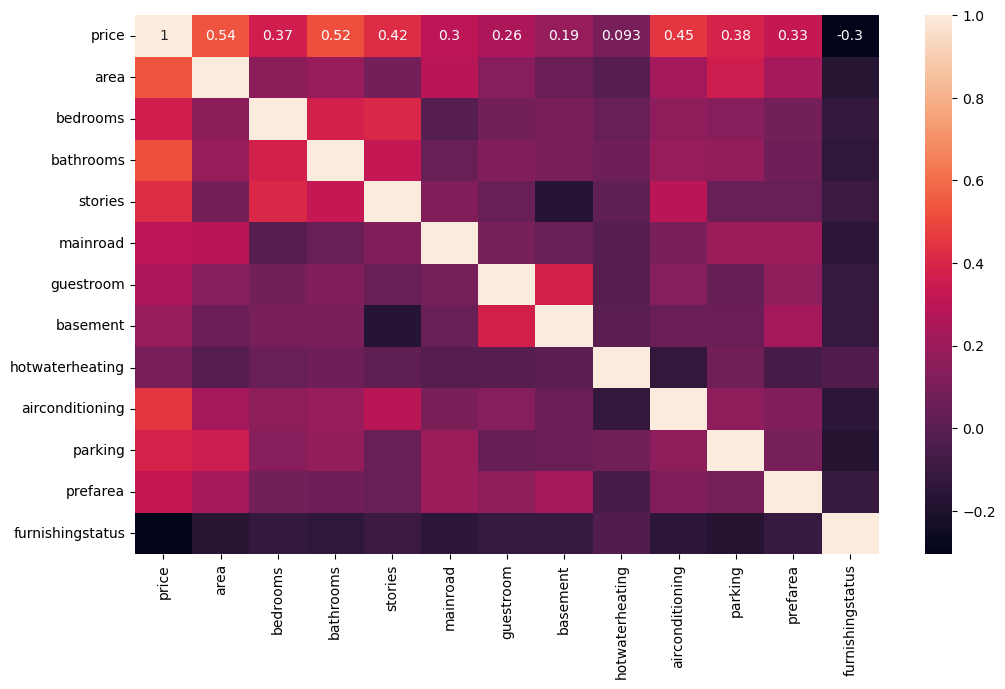

In [54]:
pyt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
print(df.corr())
pyt.show()

# Splitting The Dataset 

In [56]:
# Dropping the Column Price from the Dataset
X = df.drop('price',axis=1)
y = df['price']

In [57]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


Dataset After Dropping The Price Column

In [58]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

Dataset with Price Column

In [59]:
# Splitting the The Dataset into Training And Testing Dataset(20%) 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [60]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
167,4600,2,2,1,1,0,0,0,1,2,0,1
318,4340,3,1,1,1,0,0,0,0,0,0,1
494,6800,2,1,1,1,0,0,0,0,0,0,2
248,4100,2,2,1,1,1,1,0,0,0,0,1
512,3000,2,1,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
264,4900,2,1,2,1,0,1,0,0,0,0,1
310,5985,3,1,1,1,0,1,0,0,0,0,1
408,4000,2,1,1,1,0,0,0,0,0,0,2
395,3600,6,1,2,1,0,0,0,0,1,0,2


In [61]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
282,2175,3,1,2,0,1,1,0,1,0,0,2
31,7000,3,1,4,1,0,0,0,1,2,0,1
191,10700,3,1,2,1,1,1,0,0,0,0,1
30,7475,3,2,4,1,0,0,0,1,2,0,2
134,7000,3,1,1,1,0,1,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
457,3000,3,1,1,0,0,0,0,1,0,0,2
220,8100,4,1,4,1,0,1,0,1,2,0,1
468,2835,2,1,1,1,0,0,0,0,0,0,1
303,4500,3,1,1,1,0,1,0,0,0,0,0


In [62]:
y_train

167    5285000
318    4060000
494    2730000
248    4543000
512    2520000
        ...   
264    4410000
310    4130000
408    3430000
395    3500000
48     7455000
Name: price, Length: 436, dtype: int64

In [63]:
y_test

282    4270000
31     8400000
191    5040000
30     8400000
134    5803000
        ...   
457    3115000
220    4795000
468    3010000
303    4200000
122    5950000
Name: price, Length: 109, dtype: int64

# 

# Linear Regression Model

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
# Creating a Instance of Linear Regression Model
Model = LinearRegression()

In [66]:
Model.fit(X,y)

LinearRegression()

In [67]:
prediction = Model.predict(x_test)

In [68]:
prediction

array([ 3963673.37355531,  6581210.07040689,  5825634.51524805,
        7472766.34770253,  5381383.88146478,  3288541.49209884,
        4301223.96806274,  4439495.74758675,  8192792.78781792,
        2063488.5699271 ,  3866378.64657516,  6485753.76072639,
        3681138.35312237,  6592032.26201704,  5590019.70973831,
        3586143.60795908,  5756038.00663716,  3285727.68918634,
        6590135.35673896,  4184433.21796702,  5160471.06046339,
        3175623.47702674,  5412618.59936689,  7012065.27385678,
        4873893.04003559,  5403985.36960561,  5871152.93058865,
        2890445.49516315,  3533062.43486171,  3535348.93804558,
        2996695.75943896,  3394907.44635556,  2935759.0259161 ,
        5077290.80705885,  2372646.7144904 ,  5269093.58524217,
        7714670.05526346,  3604243.25764986,  3928875.1561409 ,
        3544554.76154719,  5996789.80898875,  4514404.34552767,
        5663456.59207091,  2240321.06319705,  2810945.48285692,
        6480210.71692324,  4456702.82217

# Evaluating the Model

In [69]:
score = r2_score(y_test,prediction)

In [70]:
score

0.7061030352103841

In [71]:
score*100

70.6103035210384

In [72]:
mse = mean_squared_error(y_test,prediction)

In [73]:
mse

1081914530397.7828

In [74]:
mae = mean_absolute_error(y_test,prediction)

In [75]:
mae

820710.8084861051